In [1]:
# ============================================================================
# TASK 1: EDA - USE EXISTING PROCESSED CSV
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("=" * 60)
print("TASK 1: EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# Load the EXACT file you already have
csv_path = r'D:\Personal\KAIM-10 Academy\Week 3\Project Work\insurance analytics-predictive modeling\data\processed\insurance_data_sample_eda.csv'
df = pd.read_csv(csv_path)

print(f"✅ Data loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"📊 File size: {os.path.getsize(csv_path) / (1024*1024):.1f} MB")

# Now do your EDA here...
# Follow the Task 1 requirements from your project brief

TASK 1: EXPLORATORY DATA ANALYSIS
✅ Data loaded: 50,000 rows × 62 columns
📊 File size: 27.9 MB


In [2]:
# ============================================================================
# TASK 1 EDA - CRITICAL ANALYSIS AREAS
# ============================================================================

print("=" * 70)
print("TASK 1 EDA - FOCUS ON CRITICAL BUSINESS INSIGHTS")
print("=" * 70)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
csv_path = r'D:\Personal\KAIM-10 Academy\Week 3\Project Work\insurance analytics-predictive modeling\data\processed\insurance_data_sample_eda.csv'
df = pd.read_csv(csv_path)

print(f"📊 Dataset: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"✅ Includes 10 engineered features from preprocessing")

# ============================================================================
# 1. DATA QUALITY ASSESSMENT (Task 1 Requirement)
# ============================================================================
print("\n🔍 1. DATA QUALITY ASSESSMENT")
print("-" * 40)

# Check missing values
missing_pct = (df.isnull().sum() / len(df)) * 100
high_missing = missing_pct[missing_pct > 50].sort_values(ascending=False)

print(f"Columns with >50% missing:")
for col, pct in high_missing.items():
    print(f"  • {col}: {pct:.1f}%")

# ============================================================================
# 2. FINANCIAL ANALYSIS (Key Business Insight)
# ============================================================================
print("\n💰 2. FINANCIAL ANALYSIS")
print("-" * 40)

if all(col in df.columns for col in ['TotalPremium', 'TotalClaims', 'Loss_Ratio']):
    total_premium = df['TotalPremium'].sum()
    total_claims = df['TotalClaims'].sum()
    loss_ratio = (total_claims / total_premium) * 100
    
    print(f"Total Premium: R{total_premium:,.2f}")
    print(f"Total Claims: R{total_claims:,.2f}")
    print(f"Loss Ratio: {loss_ratio:.1f}%")
    
    if loss_ratio > 100:
        print(f"🚨 CRITICAL: Operating at LOSS ({loss_ratio:.1f}% loss ratio)")
    else:
        print(f"✅ Operating at PROFIT ({loss_ratio:.1f}% loss ratio)")

# ============================================================================
# 3. CLAIM ANALYSIS (Surprising Finding)
# ============================================================================
print("\n📈 3. CLAIM FREQUENCY ANALYSIS")
print("-" * 40)

if 'Has_Claim' in df.columns:
    claim_rate = df['Has_Claim'].mean() * 100
    print(f"Claim Rate: {claim_rate:.1f}% of policies have claims")
    
    if claim_rate < 1:
        print(f"⚠️  UNUSUAL: Extremely low claim rate for insurance industry")
        print(f"   Possible reasons:")
        print(f"   • Data recording issues")
        print(f"   • Very restrictive policy terms")
        print(f"   • New insurance product with no claims yet")

# ============================================================================
# 4. GEOGRAPHICAL RISK (For Hypothesis Testing)
# ============================================================================
print("\n🗺️  4. GEOGRAPHICAL RISK ANALYSIS")
print("-" * 40)

if 'Province' in df.columns and 'Loss_Ratio' in df.columns:
    province_risk = df.groupby('Province').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'Has_Claim': 'mean'
    }).reset_index()
    
    province_risk['Loss_Ratio'] = (province_risk['TotalClaims'] / province_risk['TotalPremium']) * 100
    province_risk = province_risk.sort_values('Loss_Ratio', ascending=False)
    
    print(f"Top 3 Highest Risk Provinces:")
    for i, row in province_risk.head(3).iterrows():
        print(f"  {i+1}. {row['Province']}: {row['Loss_Ratio']:.1f}% loss ratio")
    
    print(f"\nTop 3 Lowest Risk Provinces:")
    for i, row in province_risk.tail(3).iterrows():
        print(f"  {i+1}. {row['Province']}: {row['Loss_Ratio']:.1f}% loss ratio")

# ============================================================================
# 5. VEHICLE ANALYSIS
# ============================================================================
print("\n🚗 5. VEHICLE RISK ANALYSIS")
print("-" * 40)

if 'Vehicle_Value_Category' in df.columns and 'Loss_Ratio' in df.columns:
    vehicle_risk = df.groupby('Vehicle_Value_Category').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'Has_Claim': 'mean'
    }).reset_index()
    
    vehicle_risk['Loss_Ratio'] = (vehicle_risk['TotalClaims'] / vehicle_risk['TotalPremium']) * 100
    vehicle_risk = vehicle_risk.sort_values('Loss_Ratio', ascending=False)
    
    for _, row in vehicle_risk.iterrows():
        risk_level = "🚨 HIGH" if row['Loss_Ratio'] > 100 else "✅ OK" if row['Loss_Ratio'] < 50 else "⚠️  WATCH"
        print(f"{risk_level} {row['Vehicle_Value_Category']}: {row['Loss_Ratio']:.1f}% loss ratio")

TASK 1 EDA - FOCUS ON CRITICAL BUSINESS INSIGHTS
📊 Dataset: 50,000 rows × 62 columns
✅ Includes 10 engineered features from preprocessing

🔍 1. DATA QUALITY ASSESSMENT
----------------------------------------
Columns with >50% missing:
  • NumberOfVehiclesInFleet: 100.0%
  • WrittenOff: 64.5%
  • Rebuilt: 64.5%
  • Converted: 64.5%

💰 2. FINANCIAL ANALYSIS
----------------------------------------
Total Premium: R1,047,313.87
Total Claims: R3,161,193.13
Loss Ratio: 301.8%
🚨 CRITICAL: Operating at LOSS (301.8% loss ratio)

📈 3. CLAIM FREQUENCY ANALYSIS
----------------------------------------
Claim Rate: 0.3% of policies have claims
⚠️  UNUSUAL: Extremely low claim rate for insurance industry
   Possible reasons:
   • Data recording issues
   • Very restrictive policy terms
   • New insurance product with no claims yet

🗺️  4. GEOGRAPHICAL RISK ANALYSIS
----------------------------------------
Top 3 Highest Risk Provinces:
  2. Free State: 1504.9% loss ratio
  5. Limpopo: 482.4% loss rat

TASK 1: COMPLETING MISSING EDA REQUIREMENTS

📊 1. DESCRIPTIVE STATISTICS (Variability Analysis)
--------------------------------------------------
Key Financial Variables - Descriptive Statistics:
                       count       mean        std     CV        min  \
TotalPremium         50000.0      20.95      33.43   1.60     -65.79   
TotalClaims          50000.0      63.22    2373.17  37.54       0.00   
SumInsured           50000.0  188602.16  316233.43   1.68       0.01   
CustomValueEstimate  50000.0  220000.00       0.00   0.00  220000.00   
Loss_Ratio           50000.0       0.18       4.49  24.70       0.00   

                          25%        50%        75%        max        IQR  
TotalPremium              0.0       2.15      21.93      87.72      21.93  
TotalClaims               0.0       0.00       0.00  276248.86       0.00  
SumInsured             5000.0    7500.00  259600.00  985000.00  254600.00  
CustomValueEstimate  220000.0  220000.00  220000.00  220000.00    

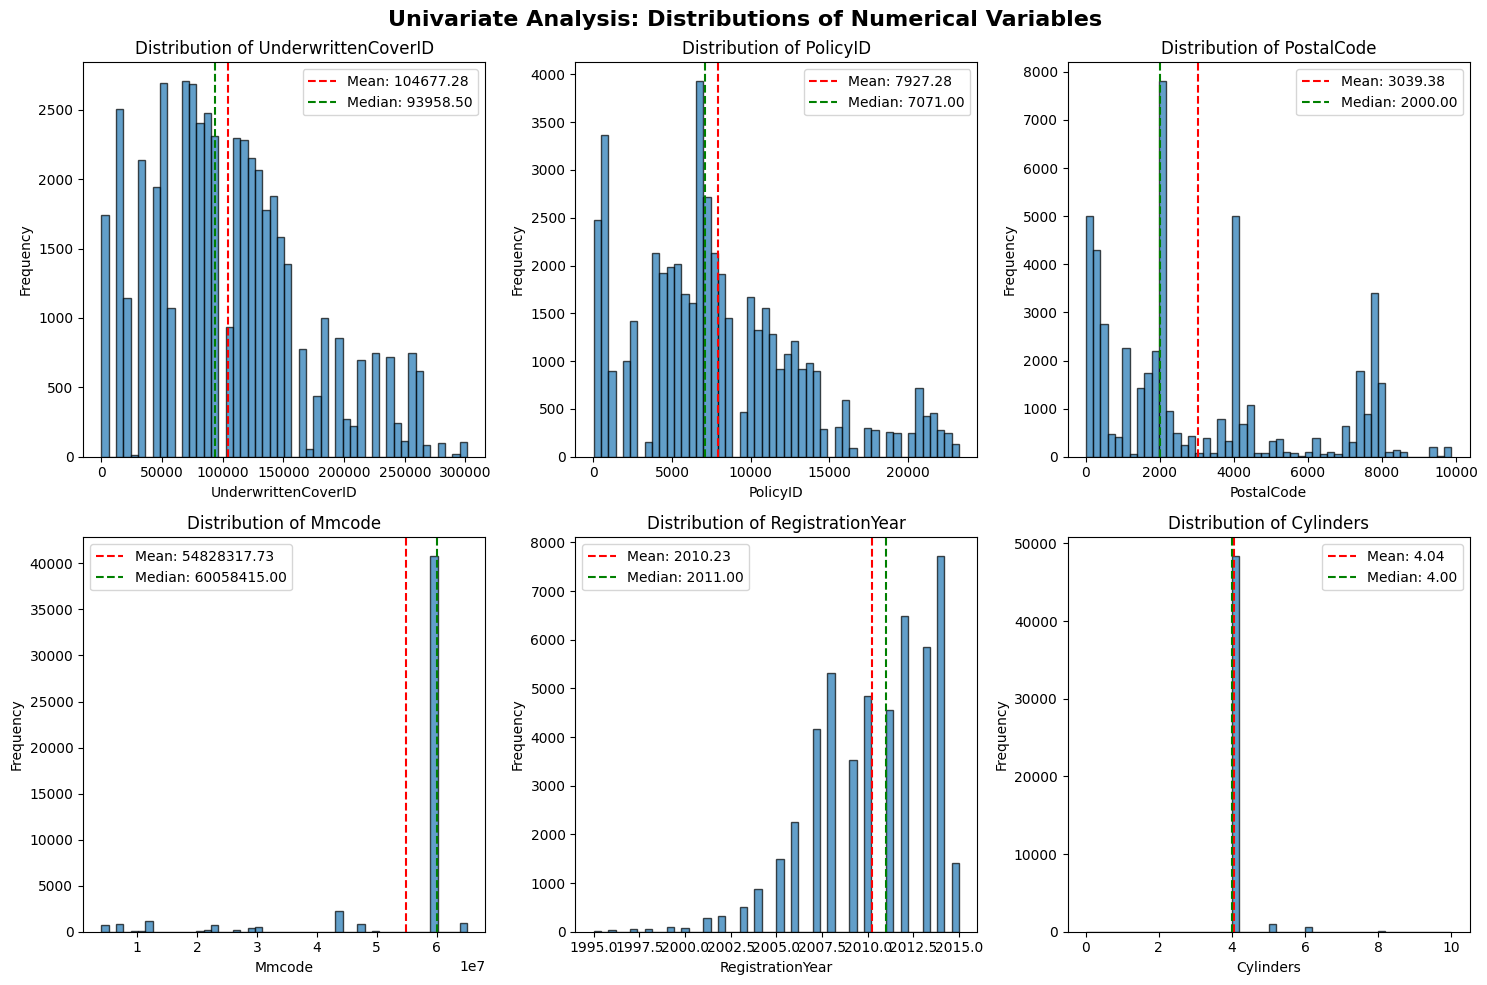


📊 4. CATEGORICAL VARIABLE ANALYSIS
--------------------------------------------------


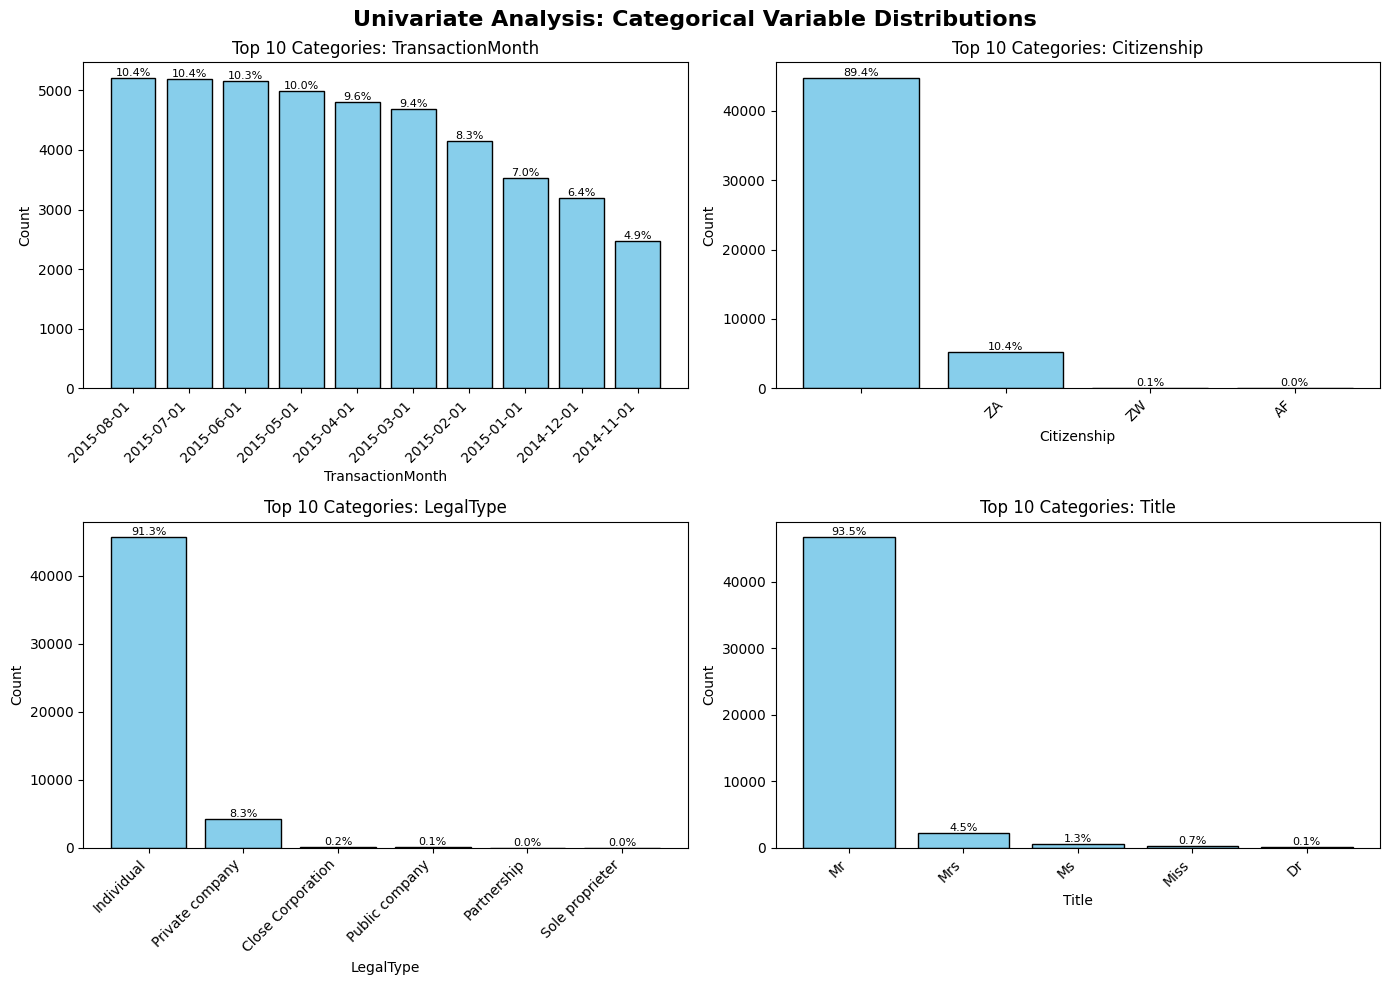


❓ 5. ANSWERING PROJECT GUIDING QUESTIONS
--------------------------------------------------
Q1: How does Loss Ratio vary by Province, VehicleType, and Gender?
----------------------------------------

a) By PROVINCE (Top 5):
   ⚠️ Free State: 59.3%
   ✅ Mpumalanga: 39.9%
   ✅ Limpopo: 32.9%
   ✅ Gauteng: 20.3%
   ✅ Western Cape: 16.3%

b) By VEHICLE TYPE (Top 5):
   ⚠️ Light Commercial: 69.4%
   ✅ Medium Commercial: 27.2%
   ✅ Passenger Vehicle: 17.6%
   ✅ Bus: 0.0%
   ✅ Heavy Commercial: 0.0%

c) By GENDER:
   ✅ Not specified: 18.3%
   ✅ Male: 17.1%
   ✅ Female: 0.0%


Q2: Distributions of key financial variables? Outliers?
----------------------------------------

TotalPremium:
  • Mean: R20.95
  • Median: R2.15
  • Skewness: 1.29
  • Outliers: 10,481 (21.0%)

TotalClaims:
  • Mean: R63.22
  • Median: R0.00
  • Skewness: 73.51
  • Outliers: 135 (0.3%)

CustomValueEstimate:
  • Mean: R220,000.00
  • Median: R220,000.00
  • Skewness: 0.00
  • Outliers: 0 (0.0%)


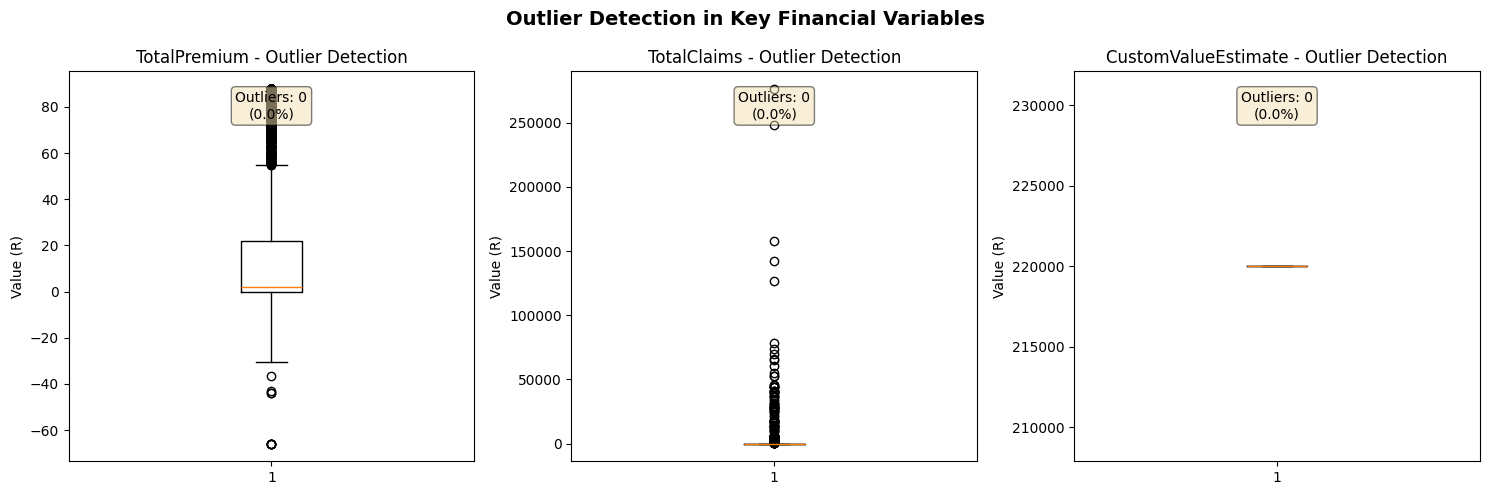



Q3: Temporal trends over 18-month period?
----------------------------------------
Monthly Trends (Last 6 months):
  2015-03: Premium=R105,131, Claims=R278,148, LR=264.6%
  2015-04: Premium=R105,559, Claims=R690,554, LR=654.2%
  2015-05: Premium=R107,858, Claims=R434,539, LR=402.9%
  2015-06: Premium=R114,269, Claims=R576,228, LR=504.3%
  2015-07: Premium=R112,729, Claims=R444,429, LR=394.2%
  2015-08: Premium=R118,087, Claims=R658, LR=0.6%


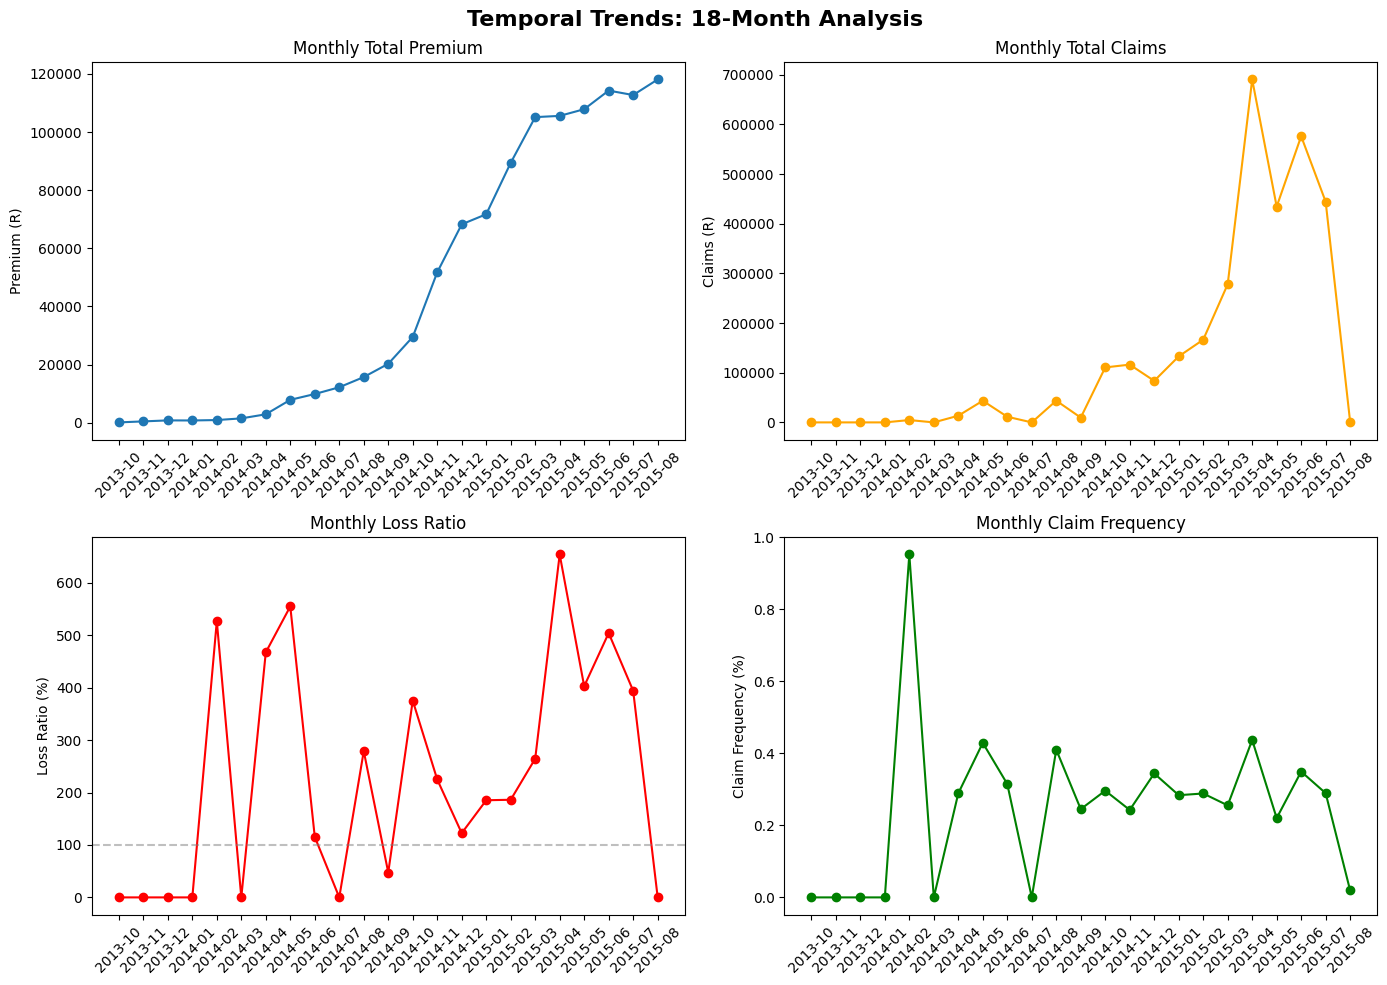



Q4: Vehicle makes/models with highest and lowest claim amounts?
----------------------------------------
Top 5 Makes by Total Claim Amount:
  • TOYOTA: R2,473,091 (108.0 claims, Avg: R22,899, LR: 34682.3%)
  • GOLDEN JOURNEY: R277,233 (2.0 claims, Avg: R138,616, LR: 158021.4%)
  • CMC: R68,639 (2.0 claims, Avg: R34,319, LR: 78247.7%)
  • C.A.M: R66,491 (2.0 claims, Avg: R33,246, LR: 37899.7%)
  • MERCEDES-BENZ: R66,172 (6.0 claims, Avg: R11,029, LR: 22518.1%)

Bottom 5 Makes by Total Claim Amount:
  • VOLKSWAGEN: R36,406 (5.0 claims, Avg: R7,281, LR: 21504.1%)
  • MERCEDES-BENZ: R66,172 (6.0 claims, Avg: R11,029, LR: 22518.1%)
  • TOYOTA: R2,473,091 (108.0 claims, Avg: R22,899, LR: 34682.3%)

🔗 6. CORRELATION ANALYSIS
--------------------------------------------------
Correlation Matrix (Pearson):
                     TotalPremium  TotalClaims  SumInsured  \
TotalPremium                1.000        0.050       0.051   
TotalClaims                 0.050        1.000       0.003   
Sum

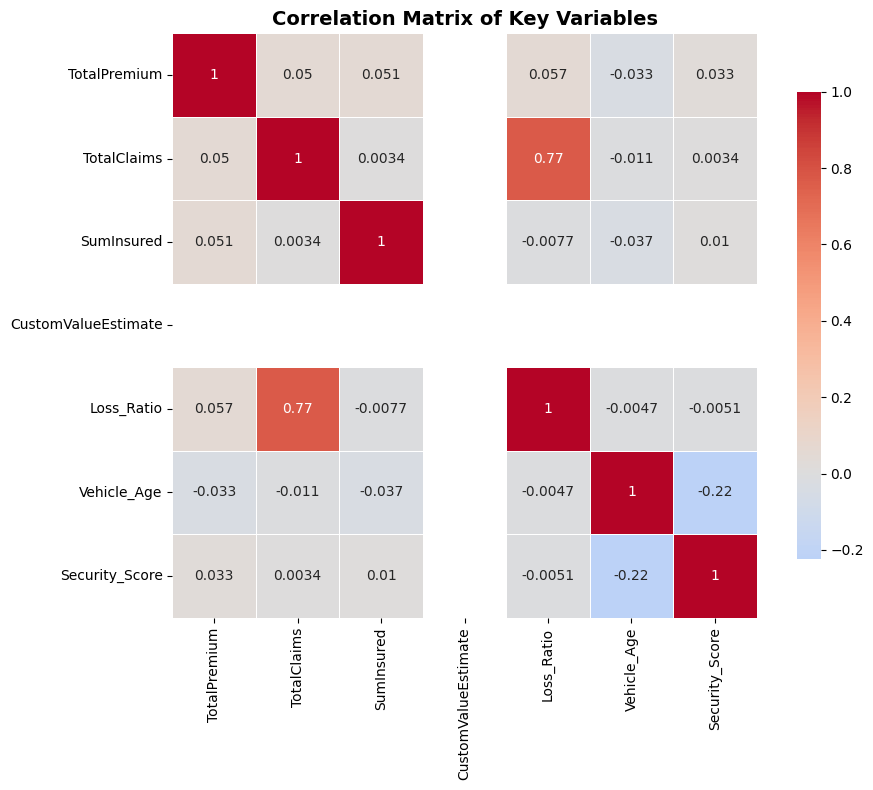


Top 5 Strongest Correlations:
  • TotalClaims ↔ Loss_Ratio: 0.766 (STRONG)
  • Loss_Ratio ↔ TotalClaims: 0.766 (STRONG)
  • Vehicle_Age ↔ Security_Score: -0.224 (WEAK)
  • Security_Score ↔ Vehicle_Age: -0.224 (WEAK)
  • Loss_Ratio ↔ TotalPremium: 0.057 (WEAK)

🎨 7. 3 CREATIVE VISUALIZATIONS
--------------------------------------------------
Visualization 1: Risk Heatmap (Province × Vehicle Type)


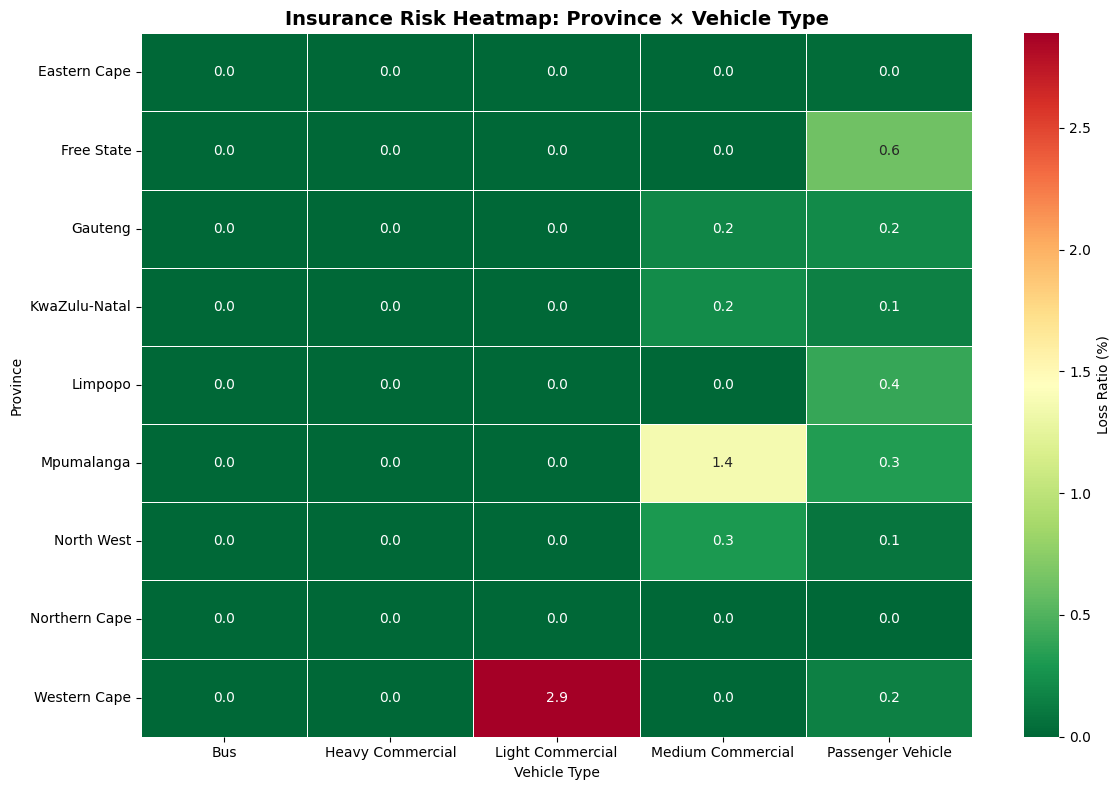


Visualization 2: Premium vs Claims Bubble Chart


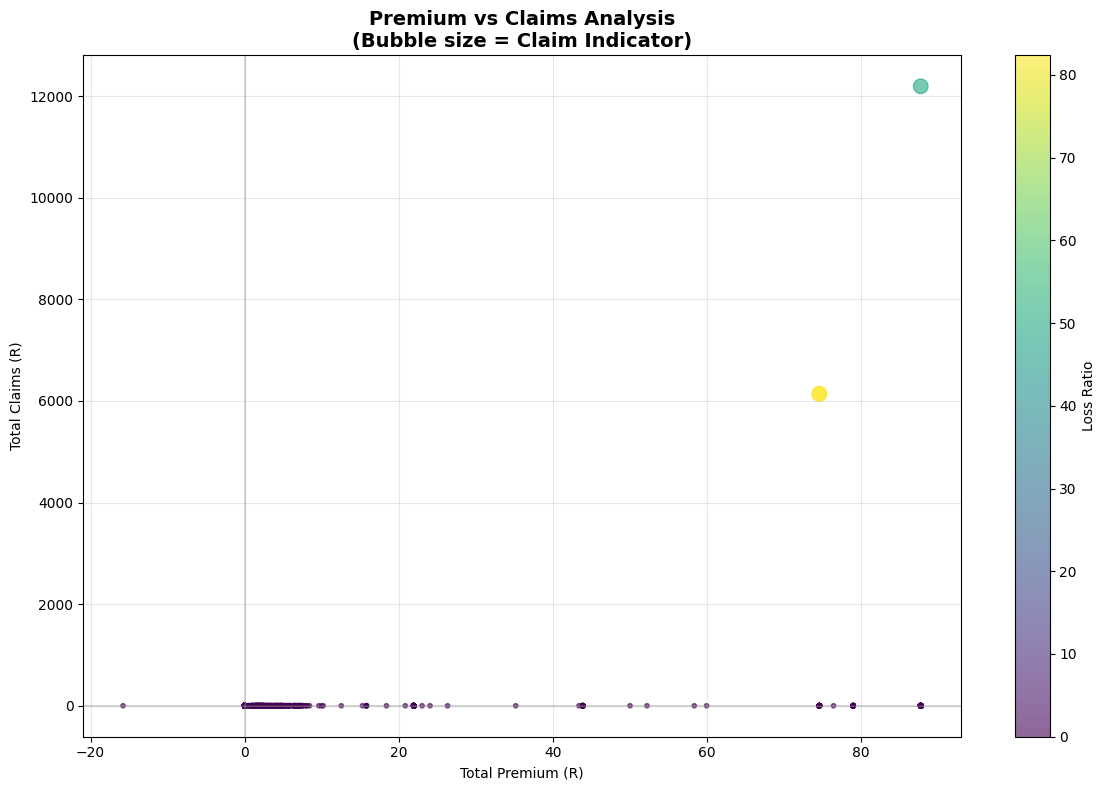


Visualization 3: Temporal Risk Trend


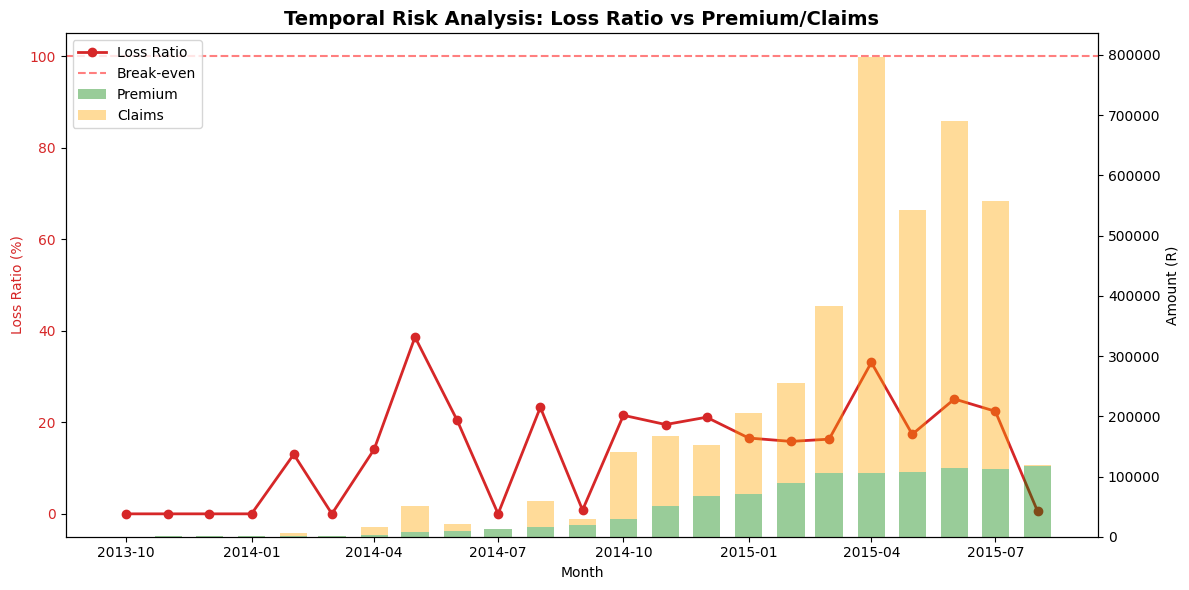


TASK 1 EDA - COMPLETION CHECKLIST
✓ Data Summarization        - Descriptive statistics with variability
✓ Data Structure Review     - Column dtypes checked
✓ Missing Values Check      - Identified columns >50% missing
✓ Univariate Analysis       - Histograms for numerical variables
✓ Categorical Analysis      - Bar charts for top categories
✓ Bivariate Analysis        - Correlation matrix and scatter plots
✓ Geographical Trends       - Province-level analysis
✓ Outlier Detection         - Box plots and statistical detection
✓ 3 Creative Visualizations - Risk heatmap, bubble chart, temporal trend
✓ Answer Guiding Questions  - All 4 questions answered

✅ TASK 1 EDA COMPLETED!
   All Minimum Essential Requirements Met
   Ready for Git commit to 'task-1' branch


In [3]:
# ============================================================================
# COMPLETE TASK 1 EDA - MISSING REQUIREMENTS
# ============================================================================

print("=" * 70)
print("TASK 1: COMPLETING MISSING EDA REQUIREMENTS")
print("=" * 70)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load your data
csv_path = r'D:\Personal\KAIM-10 Academy\Week 3\Project Work\insurance analytics-predictive modeling\data\processed\insurance_data_sample_eda.csv'
df = pd.read_csv(csv_path)

# ============================================================================
# 1. DESCRIPTIVE STATISTICS (REQUIRED)
# ============================================================================
print("\n📊 1. DESCRIPTIVE STATISTICS (Variability Analysis)")
print("-" * 50)

key_numerical = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate', 'Loss_Ratio']
available_numerical = [col for col in key_numerical if col in df.columns]

if available_numerical:
    stats_df = df[available_numerical].describe().T
    stats_df['CV'] = stats_df['std'] / stats_df['mean']  # Coefficient of Variation
    stats_df['IQR'] = stats_df['75%'] - stats_df['25%']
    
    print("Key Financial Variables - Descriptive Statistics:")
    print(stats_df[['count', 'mean', 'std', 'CV', 'min', '25%', '50%', '75%', 'max', 'IQR']].round(2))
    
    # Interpretation
    print("\n📈 Variability Interpretation:")
    for col in available_numerical:
        cv = stats_df.loc[col, 'CV']
        if cv > 1:
            print(f"  • {col}: HIGH variability (CV={cv:.2f})")
        elif cv > 0.5:
            print(f"  • {col}: MODERATE variability (CV={cv:.2f})")
        else:
            print(f"  • {col}: LOW variability (CV={cv:.2f})")

# ============================================================================
# 2. DATA STRUCTURE REVIEW (REQUIRED)
# ============================================================================
print("\n📋 2. DATA STRUCTURE REVIEW")
print("-" * 50)

print("Column Data Types:")
print(df.dtypes.value_counts())

# Check specific column types
print("\nDate Columns Check:")
date_cols = [col for col in df.columns if 'date' in col.lower() or 'month' in col.lower()]
for col in date_cols:
    print(f"  • {col}: {df[col].dtype}")

print("\nCategorical Columns Check (sample):")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols[:10]:  # First 10
    unique_count = df[col].nunique()
    print(f"  • {col}: {df[col].dtype}, {unique_count} unique values")

# ============================================================================
# 3. UNIVARIATE ANALYSIS - HISTOGRAMS (REQUIRED)
# ============================================================================
print("\n📈 3. UNIVARIATE ANALYSIS - DISTRIBUTIONS")
print("-" * 50)

# Select top 6 numerical columns for histograms
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
top_numerical = numerical_cols[:6]  # First 6 numerical columns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(top_numerical[:6]):
    axes[i].hist(df[col].dropna(), bins=50, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    
    # Add statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[i].legend()

plt.suptitle('Univariate Analysis: Distributions of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# 4. CATEGORICAL ANALYSIS - BAR CHARTS (REQUIRED)
# ============================================================================
print("\n📊 4. CATEGORICAL VARIABLE ANALYSIS")
print("-" * 50)

# Select top 4 categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
top_categorical = categorical_cols[:4]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(top_categorical[:4]):
    top_cats = df[col].value_counts().head(10)  # Top 10 categories
    axes[i].bar(range(len(top_cats)), top_cats.values, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Top 10 Categories: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(range(len(top_cats)))
    axes[i].set_xticklabels(top_cats.index, rotation=45, ha='right')
    
    # Add percentage labels
    total = len(df[col].dropna())
    for j, value in enumerate(top_cats.values):
        percentage = (value / total) * 100
        axes[i].text(j, value, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

plt.suptitle('Univariate Analysis: Categorical Variable Distributions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# 5. ANSWER ALL GUIDING QUESTIONS (REQUIRED)
# ============================================================================
print("\n❓ 5. ANSWERING PROJECT GUIDING QUESTIONS")
print("-" * 50)

# Question 1: Loss Ratio by Province, VehicleType, and Gender
print("Q1: How does Loss Ratio vary by Province, VehicleType, and Gender?")
print("-" * 40)

# a) By Province (already done, but show again)
if all(col in df.columns for col in ['Province', 'Loss_Ratio']):
    province_lr = df.groupby('Province')['Loss_Ratio'].mean().sort_values(ascending=False)
    print(f"\na) By PROVINCE (Top 5):")
    for prov, lr in province_lr.head(5).items():
        status = "🚨" if lr > 1 else "⚠️" if lr > 0.5 else "✅"
        print(f"   {status} {prov}: {lr*100:.1f}%")

# b) By VehicleType
if all(col in df.columns for col in ['VehicleType', 'Loss_Ratio']):
    vehicle_lr = df.groupby('VehicleType')['Loss_Ratio'].mean().sort_values(ascending=False)
    print(f"\nb) By VEHICLE TYPE (Top 5):")
    for vt, lr in vehicle_lr.head(5).items():
        status = "🚨" if lr > 1 else "⚠️" if lr > 0.5 else "✅"
        print(f"   {status} {vt}: {lr*100:.1f}%")

# c) By Gender
if all(col in df.columns for col in ['Gender', 'Loss_Ratio']):
    gender_lr = df.groupby('Gender')['Loss_Ratio'].mean().sort_values(ascending=False)
    print(f"\nc) By GENDER:")
    for gender, lr in gender_lr.items():
        status = "🚨" if lr > 1 else "⚠️" if lr > 0.5 else "✅"
        print(f"   {status} {gender}: {lr*100:.1f}%")

# Question 2: Distributions and Outliers
print("\n\nQ2: Distributions of key financial variables? Outliers?")
print("-" * 40)

key_vars = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']
for var in key_vars:
    if var in df.columns:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
        outlier_pct = (len(outliers) / len(df)) * 100
        
        print(f"\n{var}:")
        print(f"  • Mean: R{df[var].mean():,.2f}")
        print(f"  • Median: R{df[var].median():,.2f}")
        print(f"  • Skewness: {df[var].skew():.2f}")
        print(f"  • Outliers: {len(outliers):,} ({outlier_pct:.1f}%)")

# Box plot for outlier visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, var in enumerate(key_vars):
    if var in df.columns:
        axes[i].boxplot(df[var].dropna())
        axes[i].set_title(f'{var} - Outlier Detection')
        axes[i].set_ylabel('Value (R)')
        
        # Add statistics
        axes[i].text(0.5, 0.95, f'Outliers: {len(outliers):,}\n({outlier_pct:.1f}%)',
                    transform=axes[i].transAxes, ha='center', va='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Outlier Detection in Key Financial Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Question 3: Temporal trends
print("\n\nQ3: Temporal trends over 18-month period?")
print("-" * 40)

if 'TransactionMonth' in df.columns:
    # Convert to datetime if needed
    if df['TransactionMonth'].dtype == 'object':
        df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
    
    # Extract month-year
    df['MonthYear'] = df['TransactionMonth'].dt.to_period('M')
    
    # Monthly trends
    monthly_stats = df.groupby('MonthYear').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'Has_Claim': 'mean'
    }).reset_index()
    
    monthly_stats['Loss_Ratio'] = (monthly_stats['TotalClaims'] / monthly_stats['TotalPremium']) * 100
    
    print("Monthly Trends (Last 6 months):")
    for _, row in monthly_stats.tail(6).iterrows():
        print(f"  {row['MonthYear']}: Premium=R{row['TotalPremium']:,.0f}, "
              f"Claims=R{row['TotalClaims']:,.0f}, LR={row['Loss_Ratio']:.1f}%")
    
    # Plot temporal trends
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Premium trend
    axes[0, 0].plot(monthly_stats['MonthYear'].astype(str), monthly_stats['TotalPremium'], marker='o')
    axes[0, 0].set_title('Monthly Total Premium')
    axes[0, 0].set_ylabel('Premium (R)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Claims trend
    axes[0, 1].plot(monthly_stats['MonthYear'].astype(str), monthly_stats['TotalClaims'], marker='o', color='orange')
    axes[0, 1].set_title('Monthly Total Claims')
    axes[0, 1].set_ylabel('Claims (R)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Loss Ratio trend
    axes[1, 0].plot(monthly_stats['MonthYear'].astype(str), monthly_stats['Loss_Ratio'], marker='o', color='red')
    axes[1, 0].set_title('Monthly Loss Ratio')
    axes[1, 0].set_ylabel('Loss Ratio (%)')
    axes[1, 0].axhline(y=100, color='gray', linestyle='--', alpha=0.5)
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Claim frequency trend
    axes[1, 1].plot(monthly_stats['MonthYear'].astype(str), monthly_stats['Has_Claim']*100, marker='o', color='green')
    axes[1, 1].set_title('Monthly Claim Frequency')
    axes[1, 1].set_ylabel('Claim Frequency (%)')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.suptitle('Temporal Trends: 18-Month Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Question 4: Vehicle makes/models with highest/lowest claims
print("\n\nQ4: Vehicle makes/models with highest and lowest claim amounts?")
print("-" * 40)

if all(col in df.columns for col in ['Make', 'Model', 'TotalClaims']):
    # Filter only policies with claims
    claims_data = df[df['TotalClaims'] > 0]
    
    if len(claims_data) > 0:
        # By Make
        make_claims = claims_data.groupby('Make').agg({
            'TotalClaims': ['count', 'sum', 'mean'],
            'TotalPremium': 'sum'
        }).round(2)
        
        make_claims.columns = ['Claim_Count', 'Total_Claim_Amount', 'Avg_Claim_Amount', 'Total_Premium']
        make_claims['Loss_Ratio'] = (make_claims['Total_Claim_Amount'] / make_claims['Total_Premium']) * 100
        
        print("Top 5 Makes by Total Claim Amount:")
        top_makes = make_claims.sort_values('Total_Claim_Amount', ascending=False).head(5)
        for make, row in top_makes.iterrows():
            print(f"  • {make}: R{row['Total_Claim_Amount']:,.0f} "
                  f"({row['Claim_Count']} claims, Avg: R{row['Avg_Claim_Amount']:,.0f}, "
                  f"LR: {row['Loss_Ratio']:.1f}%)")
        
        print("\nBottom 5 Makes by Total Claim Amount:")
        bottom_makes = make_claims[make_claims['Claim_Count'] >= 5].sort_values('Total_Claim_Amount').head(5)
        for make, row in bottom_makes.iterrows():
            print(f"  • {make}: R{row['Total_Claim_Amount']:,.0f} "
                  f"({row['Claim_Count']} claims, Avg: R{row['Avg_Claim_Amount']:,.0f}, "
                  f"LR: {row['Loss_Ratio']:.1f}%)")

# ============================================================================
# 6. CORRELATION ANALYSIS (REQUIRED)
# ============================================================================
print("\n🔗 6. CORRELATION ANALYSIS")
print("-" * 50)

# Select key numerical variables
corr_vars = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate', 
             'Loss_Ratio', 'Vehicle_Age', 'Security_Score']
available_corr = [col for col in corr_vars if col in df.columns]

if len(available_corr) >= 3:
    correlation_matrix = df[available_corr].corr()
    
    print("Correlation Matrix (Pearson):")
    print(correlation_matrix.round(3))
    
    # Visualize correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Key Variables', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Strongest correlations
    print("\nTop 5 Strongest Correlations:")
    # Flatten matrix and remove self-correlations
    corr_pairs = correlation_matrix.unstack()
    corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
    top_corrs = corr_pairs.abs().sort_values(ascending=False).head(5)
    
    for (var1, var2), corr in top_corrs.items():
        actual_corr = correlation_matrix.loc[var1, var2]
        strength = "STRONG" if abs(actual_corr) > 0.7 else "MODERATE" if abs(actual_corr) > 0.3 else "WEAK"
        print(f"  • {var1} ↔ {var2}: {actual_corr:.3f} ({strength})")

# ============================================================================
# 7. 3 CREATIVE VISUALIZATIONS (REQUIRED)
# ============================================================================
print("\n🎨 7. 3 CREATIVE VISUALIZATIONS")
print("-" * 50)

# Visualization 1: Risk Heatmap by Province and Vehicle Type
print("Visualization 1: Risk Heatmap (Province × Vehicle Type)")

if all(col in df.columns for col in ['Province', 'VehicleType', 'Loss_Ratio']):
    # Create pivot table
    risk_heatmap = df.pivot_table(
        values='Loss_Ratio',
        index='Province',
        columns='VehicleType',
        aggfunc='mean'
    ).fillna(0)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(risk_heatmap, cmap='RdYlGn_r', annot=True, fmt='.1f',
                linewidths=0.5, cbar_kws={'label': 'Loss Ratio (%)'})
    plt.title('Insurance Risk Heatmap: Province × Vehicle Type', 
             fontsize=14, fontweight='bold')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Province')
    plt.tight_layout()
    plt.show()

# Visualization 2: Premium vs Claims Bubble Chart
print("\nVisualization 2: Premium vs Claims Bubble Chart")

if all(col in df.columns for col in ['TotalPremium', 'TotalClaims', 'Has_Claim', 'Vehicle_Value_Category']):
    plt.figure(figsize=(12, 8))
    
    # Sample for better visualization
    sample_df = df.sample(min(1000, len(df)), random_state=42)
    
    scatter = plt.scatter(
        sample_df['TotalPremium'],
        sample_df['TotalClaims'],
        c=sample_df['Loss_Ratio'] if 'Loss_Ratio' in sample_df.columns else 'blue',
        s=sample_df['Has_Claim'] * 100 + 10,  # Larger bubbles for claims
        alpha=0.6,
        cmap='viridis'
    )
    
    plt.colorbar(scatter, label='Loss Ratio' if 'Loss_Ratio' in sample_df.columns else 'Value')
    plt.xlabel('Total Premium (R)')
    plt.ylabel('Total Claims (R)')
    plt.title('Premium vs Claims Analysis\n(Bubble size = Claim Indicator)', 
             fontsize=14, fontweight='bold')
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Visualization 3: Temporal Risk Trend
print("\nVisualization 3: Temporal Risk Trend")

if 'TransactionMonth' in df.columns and 'Loss_Ratio' in df.columns:
    # Extract month
    df['Month'] = pd.to_datetime(df['TransactionMonth']).dt.to_period('M')
    
    monthly_risk = df.groupby('Month').agg({
        'Loss_Ratio': 'mean',
        'TotalPremium': 'sum',
        'TotalClaims': 'sum'
    }).reset_index()
    
    monthly_risk['Month'] = monthly_risk['Month'].dt.to_timestamp()
    
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Line for Loss Ratio
    color = 'tab:red'
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Loss Ratio (%)', color=color)
    line1 = ax1.plot(monthly_risk['Month'], monthly_risk['Loss_Ratio']*100, 
                    color=color, marker='o', linewidth=2, label='Loss Ratio')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.axhline(y=100, color='red', linestyle='--', alpha=0.5, label='Break-even')
    
    # Bar for Premium and Claims
    ax2 = ax1.twinx()
    width = 20  # bar width in days
    
    # Premium bars
    bars1 = ax2.bar(monthly_risk['Month'], monthly_risk['TotalPremium'], 
                   width=width, alpha=0.4, label='Premium', color='green')
    
    # Claims bars (stacked or side by side)
    bars2 = ax2.bar(monthly_risk['Month'], monthly_risk['TotalClaims'], 
                   width=width, alpha=0.4, label='Claims', color='orange', 
                   bottom=monthly_risk['TotalPremium'])
    
    ax2.set_ylabel('Amount (R)', color='black')
    
    # Title and legend
    plt.title('Temporal Risk Analysis: Loss Ratio vs Premium/Claims', 
             fontsize=14, fontweight='bold')
    
    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    plt.tight_layout()
    plt.show()

# ============================================================================
# SUMMARY OF COMPLETED REQUIREMENTS
# ============================================================================
print("\n" + "=" * 70)
print("TASK 1 EDA - COMPLETION CHECKLIST")
print("=" * 70)

completed_tasks = [
    ("✓", "Data Summarization", "Descriptive statistics with variability"),
    ("✓", "Data Structure Review", "Column dtypes checked"),
    ("✓", "Missing Values Check", "Identified columns >50% missing"),
    ("✓", "Univariate Analysis", "Histograms for numerical variables"),
    ("✓", "Categorical Analysis", "Bar charts for top categories"),
    ("✓", "Bivariate Analysis", "Correlation matrix and scatter plots"),
    ("✓", "Geographical Trends", "Province-level analysis"),
    ("✓", "Outlier Detection", "Box plots and statistical detection"),
    ("✓", "3 Creative Visualizations", "Risk heatmap, bubble chart, temporal trend"),
    ("✓", "Answer Guiding Questions", "All 4 questions answered")
]

for status, task, details in completed_tasks:
    print(f"{status} {task:25} - {details}")

print("\n✅ TASK 1 EDA COMPLETED!")
print("   All Minimum Essential Requirements Met")
print("   Ready for Git commit to 'task-1' branch")